Jayson/Mitchell
#Automobiles dataset

#**Introduction**

Cars are an essential form of transportation that have been consistently evolving with different car brands bringing more innovation than the next. This data set can help us understand what makes the best car for a specific userbases (sports car vs gas economic car). Various attributes of a car such as cylinders, body shape, fuel-type, peak rpm, etc vastly influence its performance and for which a large portion of people are most concerned about - gas mileage. Gas prices have increased and more fuel ecomonic choices are becoming much more appealing. We want to find common attributes from vb

#**Research Questions**

Question: What is the best combination of features for gas mileage?

Explanation: We will analyze data on different combinations of car attributes to get the best gas mileage performance.

#**Data**
We will be retrieving our data from UCI, by downloading they're CSV file fom: ('https://archive.ics.uci.edu/ml/datasets/Automobile')


#**Approach**
We intend to find these correlations through heatmaps, bar graphs, boxplots, catplots, etc. This and finding relationships between variables and doing regressions will be part of our EDA (exploratory data analysis). We believe that horsepower, number of cylinders, and drive-wheel (4WD, RWD, FWD) will hold the most influence over gas ecomony. Our hope is that this information can be used to either make more efficient vehicles or assist those that are looking for a more specific perfomance out of a car.





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import numpy as np

#Naming the missing column names
column_names = ['Symboling', 'normalized-losses', 'make','Fuel-type', 'Aspiration', '# of Doors', 'Body-Style', 'Drive-Train', 'Engine Location',\
                'Wheel-base', 'length', 'Width', 'Height', 'Curb-Weight', 'Engine-type', '# of Cylinders', 'Engine Size', 'Fuel System', 'Bore', 'Stroke',\
                'Compression-Ratio', 'Horsepower', 'Peak RPM', 'City MPG', 'Highway MPG', 'Price']

df = pd.read_csv('https://raw.githubusercontent.com/YsGonzo/Colab/main/imports-85.csv', names = column_names)


#Dropping values with "?" in categorical data and a mostly empty column.
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = df.drop(27)

df = df.drop(128)
df = df.drop(129)
df = df.drop(130)
df = df.drop(131)

df = df.drop(55)
df = df.drop(56)
df = df.drop(57)
df = df.drop(58)

df = df.drop(63)
df = df.drop(columns=['normalized-losses'])
df.head(5)

,Symboling,make,Fuel-type,Aspiration,# of Doors,Body-Style,Drive-Train,Engine Location,Wheel-base,length,Width,Height,Curb-Weight,Engine-type,# of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression-Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#Definitions
* Symboling - A rating from -3 to 3 that corresponds to the degree to which the car is more risky than it's price.
* Make - The brand of the car (Toyota, Mitsubishi, Volkswagen, etc.)
* Fuel Type - Car either uses gas or diesel
* Aspiration - Standard or Turbo
* Body Style - hardtop, wagon, sedan, hatchback, convertible.
* drive-wheels - 4 Wheel Drive, Front Wheel Drive, Rear Wheel Drive


In [ ]:
#Data types of the set
df.info()

print('\n')
#The quantity of unique values 
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          195 non-null    int64  
 1   make               195 non-null    object 
 2   Fuel-type          195 non-null    object 
 3   Aspiration         195 non-null    object 
 4   # of Doors         195 non-null    object 
 5   Body-Style         195 non-null    object 
 6   Drive-Train        195 non-null    object 
 7   Engine Location    195 non-null    object 
 8   Wheel-base         195 non-null    float64
 9   length             195 non-null    float64
 10  Width              195 non-null    float64
 11  Height             195 non-null    float64
 12  Curb-Weight        195 non-null    int64  
 13  Engine-type        195 non-null    object 
 14  # of Cylinders     195 non-null    object 
 15  Engine Size        195 non-null    int64  
 16  Fuel System        195 non

Symboling              6
make                  21
Fuel-type              2
Aspiration             2
# of Doors             2
Body-Style             5
Drive-Train            3
Engine Location        2
Wheel-base            51
length                72
Width                 41
Height                46
Curb-Weight          165
Engine-type            5
# of Cylinders         6
Engine Size           40
Fuel System            7
Bore                  38
Stroke                36
Compression-Ratio     31
Horsepower            56
Peak RPM              21
City MPG              28
Highway MPG           30
Price                178
dtype: int64

In [ ]:
#This dataset contains Zero null data
df.isnull().sum()

Symboling            0
make                 0
Fuel-type            0
Aspiration           0
# of Doors           0
Body-Style           0
Drive-Train          0
Engine Location      0
Wheel-base           0
length               0
Width                0
Height               0
Curb-Weight          0
Engine-type          0
# of Cylinders       0
Engine Size          0
Fuel System          0
Bore                 0
Stroke               0
Compression-Ratio    0
Horsepower           0
Peak RPM             0
City MPG             0
Highway MPG          0
Price                0
dtype: int64

In [ ]:
#There are values that are not "NaNs" and instead "?",
#Therefore we'll converting # of Cylinders, # of Doors, Bore, Stroke, Horsepower, Peak RPM, and Price to NaNs before imputing.


df.replace({'Bore': {'?': np.nan}}, regex=False,inplace=True)
df.replace({'Horsepower': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'# of Cylinders': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'# of Doors': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'Stroke': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'Peak RPM': {'?':np.nan}}, regex=False, inplace=True)
df.replace({'Price': {'?':np.nan}}, regex=False, inplace=True)

In [ ]:
#converting number of cylinders and number of doors, bore, stroke, horsepower, peak rpm, and price to numeric form
df[['Horsepower','Bore', 'Stroke', 'Peak RPM']] = \
  df[['Horsepower','Bore', 'Stroke', 'Peak RPM']].apply(pd.to_numeric)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          195 non-null    int64  
 1   make               195 non-null    object 
 2   Fuel-type          195 non-null    object 
 3   Aspiration         195 non-null    object 
 4   # of Doors         195 non-null    object 
 5   Body-Style         195 non-null    object 
 6   Drive-Train        195 non-null    object 
 7   Engine Location    195 non-null    object 
 8   Wheel-base         195 non-null    float64
 9   length             195 non-null    float64
 10  Width              195 non-null    float64
 11  Height             195 non-null    float64
 12  Curb-Weight        195 non-null    int64  
 13  Engine-type        195 non-null    object 
 14  # of Cylinders     195 non-null    object 
 15  Engine Size        195 non-null    int64  
 16  Fuel System        195 non

##Histogram
presenting patterns and clusters of cars featuring the same curb-weight and engine sizes. There also appears to be outliers in both compression-ratio, engine size, and MPG which may all be correlated.

<function matplotlib.pyplot.show>

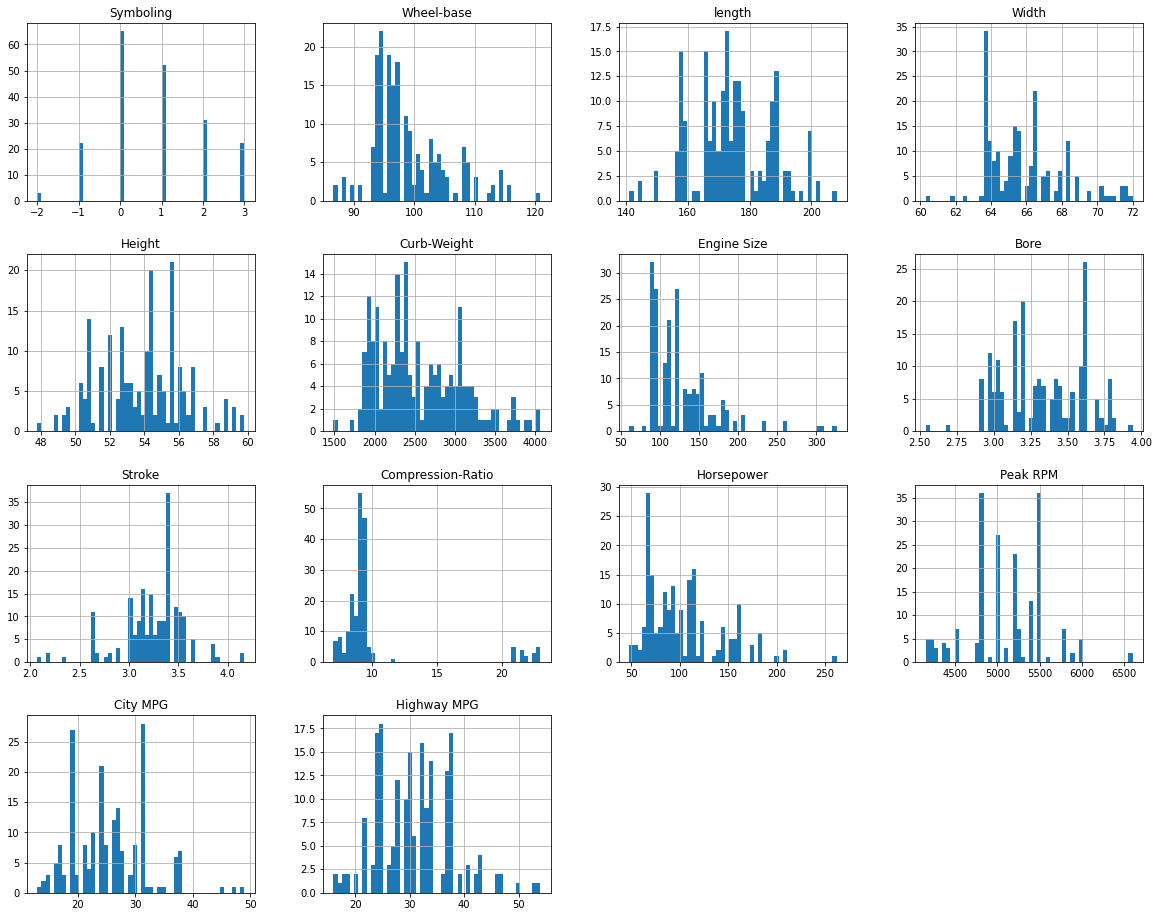

In [ ]:
#Copy of dataframe with only numerical data
df2 = df.copy()
df2.drop(['make','Fuel-type','Aspiration','# of Doors','Body-Style','Drive-Train','Engine Location','Engine-type','# of Cylinders', 'Fuel System', 'Price'], axis = 1)


df2.hist(bins=50, figsize=(20,16))
plt.show

#Correlation Matrix
We will use the seaborn library to see the correlation between all our variables.

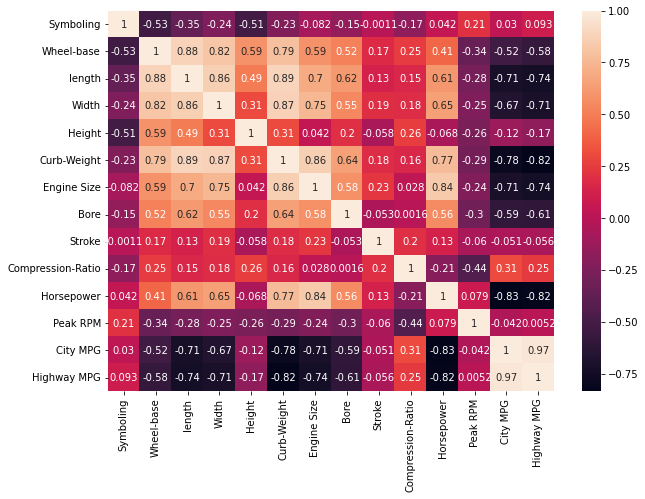

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

#Scatterplot

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1016: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **self.kwds,


TypeError: ignored

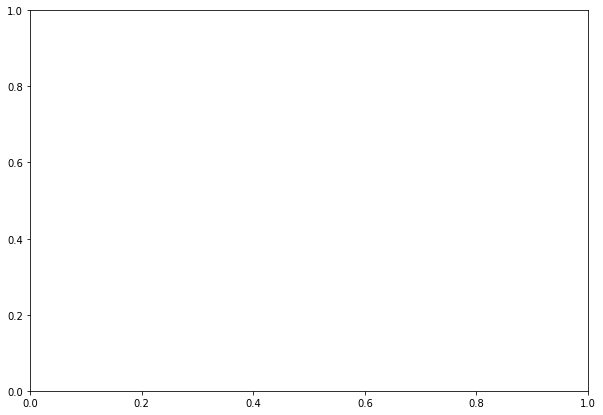

In [511]:
df.plot(kind="scatter", x="Compression-Ratio", y="Highway MPG", alpha=0.4,
    s=df["Horsepower"], label="Scatter", figsize=(10,7),
    c="", cmap='viridis', colorbar=True,
)
plt.legend()

#Imputing
We used the scikit library to create an imputer with a copied dataframe which dropped all categorical data. This makes it into an array which we convert back to a Dataframe and then confirm that we no longer have any NaNs.

In [ ]:
#importing scikit-learn for imputing and estimating
from sklearn.impute import SimpleImputer


#copy of dataframe that drops categorical data
df_numerical = df.copy()
df_numerical.drop(['make','Fuel-type','Aspiration','# of Doors','Body-Style','Drive-Train','Engine Location','Engine-type','# of Cylinders', 'Fuel System'], axis = 1, inplace=True)

#imputing strategy
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')

#convert given numpy array back to dataframe
df_numerical = pd.DataFrame(imp.fit_transform(df_numerical))



#df_numerical.columns = column_names
df_numerical.info()

ValueError: ignored

In [ ]:
#df_numerical.drop(['make','Fuel-type','Aspiration','# of Doors','Body-Style','Drive-Train','Engine Location','Engine-type','# of Cylinders', 'Fuel System'], axis = 1, inplace=True)


In [ ]:
from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(df_numerical)

df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['Symboling','Wheel-base','Length','Width','Height','Curb-Weight','Engine Size','Bore','Stroke','Compression-Ratio', 'Horsepower','Peak RPM','City MPG','Highway MPG','Price']

df_scaled.head()

,Symboling,Wheel-base,Length,Width,Height,Curb-Weight,Engine Size,Bore,Stroke,Compression-Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
0,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,1.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.6,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.8,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.8,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


In [ ]:
from sklearn.linear_model import LinearRegression

y = df_scaled['Horsepower'].copy()
x = df_scaled.drop(['Horsepower'], axis = 1)

lin_reg=LinearRegression().fit(x,y)
r_sq = lin_reg.score(x,y)

print(r_sq)

0.8891941797255277


In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Horsepower   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              351.4
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                   4.64e-123
Time:                        02:39:51   Log-Likelihood:                          277.11
No. Observations:                 195   AIC:                                     -526.2
Df Residuals:                     181   BIC:                                     -480.4
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------